# Table of contents

1. [Introduction](#Introduction)<br>
2. [Installation Of libraries](#Installation)<br>
    2.1 [Importation of libraries](#Importation)<br>
3. [Gathering Process](#Gathering)<br>
    3.1 [Getting data via normal downloads](#csv_file)<br>
    3.2 [Getting data via URL using the request library](#request_library)<br>
    3.3 [Getting data via web scraping using the Tweepy library](#Tweepy)<br>
4. [Assessing Data](#Assessing)<br>
    4.1 [First Dataset](#1stDataAssessment)<br>
    4.2 [Second Dataset](#2ndDataAssessment)<br>
    4.3 [Third Dataset](#3rdDataAssessment)<br>
    4.4 [Quality Issues](#Quality)<br>
    4.5 [Tidiness Issues](#Tidiness)<br>
5. [Data Cleaning](#Cleaning)
6. [Storing Data](#Storing)
7. [Visualising and Analysing Dataset](#VandA)
8. [Conclusion](#Conclusion)

<a id = 'Introduction'></a>

## Introduction
This Analysis is based on the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.
So here,We did be gathering the datasets, Assessing them, Cleaning them and getting insights from it.

<a id = 'Installation'></a>

In [1]:
#pip install requests

In [2]:
#pip install tweepy

<a id = 'Importation'></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import requests
import io
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

<a id = 'Gathering'></a>

## Gathering Process

In this analysis, we will be gathering data using three different Paths

<a id = 'csv_file'></a>

* ###  Getting data via normal downloads -- csv file

In [4]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
#df1.head()

<a id = 'request_library'></a>

* ### Getting data via URL using the request library

In [5]:
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv').content
#r.status_code
#r.headers['content-type']
#r.encoding
#r.text

In [6]:
df2 = pd.read_csv(io.StringIO(r.decode('utf-8')), sep='\t')
#df2.head()

<a id = 'Tweepy'></a>

* ### And lastly getting data via web scraping using the Tweepy library

In [7]:
'''import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

'import tweepy\nfrom tweepy import OAuthHandler\nimport json\nfrom timeit import default_timer as timer\n\n# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file\n# These are hidden to comply with Twitter\'s API terms and conditions\nconsumer_key = \' \'\nconsumer_secret = \' \'\naccess_token = \' \'\naccess_secret = \' \'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df1.tweet_id.values\nlen(tw

In [8]:
dfList =[]

with open('tweet-json.txt','r') as file:
    for lines in file:
        tweets = json.loads(lines)
        tweet_id = tweets['id']
        retweet_count = tweets['retweet_count']
        favorite_count = tweets['favorite_count']
        dfList.append({'tweet_id':str(tweet_id),
                        'retweet_count':int(retweet_count),
                        'favorite_count': int(favorite_count)})
        
df3 = pd.DataFrame(dfList, columns=['tweet_id','retweet_count','favorite_count'])

<a id = 'Assessing'></a>

## Assessing the Data

Here, I did be accessing the data using the visual assessment and the Programmatic assessment, And I will be splitting my findings into two different parts, which are:
* Quality issues
* Tidiness isues

Visual Assessment is done using excel, where I was able to have a gasp on what the dataset is about. Since I can't relly assess much using the visual assessment, I did be going into Programmatic assessment.

                                    

<a id = '1stDataAssessment'></a>

In [9]:
df1.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

Just looking at the dataset, we can see this dataset has a lot of null values also there 'doggo','floofer','pupper' and 'puppo' columns displaces a none which looks kind of wierld.
Lets just go straight to looking into the data programmatically , so has to get full view of the data

In [10]:
df1.shape

(2356, 17)

In [11]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

This data consists of 2356 rows and 17 coumns

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df1.duplicated().sum()

0

No duplicates

In [14]:
df1.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [15]:
df1['name'].nunique()

957

<a id = '2ndDataAssessment'></a>

In [16]:
df2.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [17]:
df2.tail()

tweet_id                                          jpg_url  \
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
2070        2       basset  0.555712    True    English_springer  0.225770   
2071        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
2072        1    Chihuahua  0.716012    True            malamute  0.078253   
2073        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2074        1       orange  0.097049   False               bagel  0.085851   

      p2_dog                           p3   p3_conf  p3_dog  
2070    True  German_short-haired_pointer  0.175219    True  
2071    True                      spatula  0.040836   False  
2072    True                       kelpie  0.031379    True  
2073    True                     papillon  0.068957    True  
2074   False                       banana  0.076110   False

In [18]:
df2.shape

(2075, 12)

This data consist of 2075 rows and 12 columns

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The dataset has no null values

In [20]:
df2.duplicated().sum()

0

In [21]:
df2.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [22]:
df2['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

<a id = '3rdDataAssessment'></a>

In [23]:
df3.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           8853           39467
1  892177421306343426           6514           33819
2  891815181378084864           4328           25461
3  891689557279858688           8964           42908
4  891327558926688256           9774           41048

In [24]:
df3.shape

(2354, 3)

The data consists of 2354 rows and 3 columnss

In [25]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


No null values

In [26]:
df3.duplicated().sum()

0

In [27]:
df3.describe()

retweet_count  favorite_count
count    2354.000000     2354.000000
mean     3164.797366     8080.968564
std      5284.770364    11814.771334
min         0.000000        0.000000
25%       624.500000     1415.000000
50%      1473.500000     3603.500000
75%      3652.000000    10122.250000
max     79515.000000   132810.000000

<a id = 'Quality'></a>

## Quality issue


* Remove retweets and replies (text column starts with RT @) as a user can retweet their on tweet.
* Columns likes 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id ', 'retweeted_status_user_id', s'retweeted_status_timestamp' and 'expanded_urls' has null values.
* Incorrect Datatype -- Tweet_id column should be an object and not int since we cannot make any arithmetic operation with it,<br>The timestamp column should be in datetime data type and not object datatype .<br>
    tweet_id should be an object not int datatype for the df2 dataset too
* The timestamp should be split into date and time
* Get the exact tweet source.
* We have some entries which are not names at the name column

* Texts in 'P1', 'p2', 'p3'  column should all be in lower case to avoid reading the same text differently.-- Second Dataset
* Rename 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog' columns to make more meaning. -- Second Dataset 



<a id = 'Tidiness'></a>

## Tidiness issue

* Doggo, floofer, pupper, puppo columns are like dog nick names / names , it should be made into a single column.
* Some of the tables have similar columns, so they should be merge together.

<a id = 'Cleaning'></a>

## Data Cleaning

Firstly, I did be making a copy of the datasets, so we will be working on the copy parts.

In [28]:
df1_Copy = df1.copy()
df2_Copy = df2.copy()
df3_Copy = df3.copy()

## Issue_1
remove retweets (text column starts with RT @) as a user can retweet their on tweet.

In [29]:
df1.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

## Code

In [30]:
df1_Copy = df1_Copy[df1_Copy.retweeted_status_id.isnull()]
df1_Copy = df1_Copy[df1_Copy.retweeted_status_user_id.isnull()]
df1_Copy = df1_Copy[df1_Copy.retweeted_status_timestamp.isnull()]
df1_Copy = df1_Copy[df1_Copy.in_reply_to_status_id.isnull()]
df1_Copy = df1_Copy[df1_Copy.in_reply_to_user_id .isnull()]

## Test

In [31]:
df1_Copy.shape

(2097, 17)

## Issue_2

Columns likes 'in_reply_to_status_id', 'in_reply_to_user_id', and 'expanded_urls' has null values.

### Code

In [32]:
df1_Copy = df1_Copy.dropna(axis = 1)
df1_Copy

tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
...                  ...                        ...   
2351  666049248165822465  2015-11-16 00:24:50 +0000   
2352  666044226329800704  2015-11-16 00:04:52 +0000   
2353  666033412701032449  2015-11-15 23:21:54 +0000   
2354  666029285002620928  2015-11-15 23:05:30 +0000   
2355  666020888022790149  2015-11-15 22:32:08 +0000   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2351  <a href="http://twitter.com/download/iphone" r...   
2352  <a href="http://twitter.com/download/iphone" r...   
2353  <a href="http://twitter.com/download/iphone" r...   
2354  <a href="http://twitter.com/download/iphone" r...   
2355  <a href="http://twitter.com/download/iphone" r...   

                                                   text  rating_numerator  \
0     This is Phineas. He's a mystical boy. Only eve...                13   
1     This is Tilly. She's just checking pup on you....                13   
2     This is Archie. He is a rare Norwegian Pouncin...                12   
3     This is Darla. She commenced a snooze mid meal...                13   
4     This is Franklin. He would like you to stop ca...                12   
...                                                 ...               ...   
2351  Here we have a 1949 1st generation vulpix. Enj...                 5   
2352  This is a purebred Piers Morgan. Loves to Netf...                 6   
2353  Here is a very happy pup. Big fan of well-main...                 9   
2354  This is a western brown Mitsubishi terrier. Up...                 7   
2355  Here we have a Japanese Irish Setter. Lost eye...                 8   

      rating_denominator      name doggo floofer pupper puppo  
0                     10   Phineas  None    None   None  None  
1                     10     Tilly  None    None   None  None  
2                     10    Archie  None    None   None  None  
3                     10     Darla  None    None   None  None  
4                     10  Franklin  None    None   None  None  
...                  ...       ...   ...     ...    ...   ...  
2351                  10      None  None    None   None  None  
2352                  10         a  None    None   None  None  
2353                  10         a  None    None   None  None  
2354                  10         a  None    None   None  None  
2355                  10      None  None    None   None  None  

[2097 rows x 11 columns]

## Test

In [33]:
df1_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


## Issue_3
* Tweet_id column should be an object and not int since we cannot make any arithmetic operation with it<br>
* The timestamp column should be in datetime data type and not object datatype .<br>
* tweet_id should be an object not int datatype for the df2 dataset too

## Code

In [34]:
df1_Copy['tweet_id'] = df1_Copy['tweet_id'].astype(object)
df1_Copy['timestamp'] = pd.to_datetime(df1_Copy['timestamp'])
df2_Copy['tweet_id'] = df2_Copy['tweet_id'].astype(object)

## Test

In [35]:
df1_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(2), object(8)
memory usage: 196.6+ KB


In [36]:
df2_Copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## Issue_4
The timestamp should be split into date and time

## Code

In [37]:
df1_Copy['Dates'] = pd. to_datetime(df1_Copy['timestamp']). dt.date
df1_Copy['Time'] = pd. to_datetime(df1_Copy['timestamp']). dt.time

In [38]:
df1_Copy.head(2)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   

   rating_denominator     name doggo floofer pupper puppo       Dates  \
0                  10  Phineas  None    None   None  None  2017-08-01   
1                  10    Tilly  None    None   None  None  2017-08-01   

       Time  
0  16:23:56  
1  00:17:27

## Test

In [39]:
df1_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  Dates               2097 non-null   object             
 12  Time                2097 non-null 

## Issue_5
Get the exact tweet source.

## Code

In [40]:
df1_Copy['source']

0       <a href="http://twitter.com/download/iphone" r...
1       <a href="http://twitter.com/download/iphone" r...
2       <a href="http://twitter.com/download/iphone" r...
3       <a href="http://twitter.com/download/iphone" r...
4       <a href="http://twitter.com/download/iphone" r...
                              ...                        
2351    <a href="http://twitter.com/download/iphone" r...
2352    <a href="http://twitter.com/download/iphone" r...
2353    <a href="http://twitter.com/download/iphone" r...
2354    <a href="http://twitter.com/download/iphone" r...
2355    <a href="http://twitter.com/download/iphone" r...
Name: source, Length: 2097, dtype: object

In [41]:
df1_Copy['source'] = df1_Copy['source'].str.extract('(?:.*/)([a-z]+)(?:")')

## Test

In [42]:
df1_Copy.head(3)

tweet_id                 timestamp  source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  iphone   
1  892177421306343426 2017-08-01 00:17:27+00:00  iphone   
2  891815181378084864 2017-07-31 00:18:03+00:00  iphone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...                13   
1  This is Tilly. She's just checking pup on you....                13   
2  This is Archie. He is a rare Norwegian Pouncin...                12   

   rating_denominator     name doggo floofer pupper puppo       Dates  \
0                  10  Phineas  None    None   None  None  2017-08-01   
1                  10    Tilly  None    None   None  None  2017-08-01   
2                  10   Archie  None    None   None  None  2017-07-31   

       Time  
0  16:23:56  
1  00:17:27  
2  00:18:03

In [43]:
df1_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              1975 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  Dates               2097 non-null   object             
 12  Time                2097 non-null 

Null value is present at the source column, now we did be filling it with the mode

In [44]:
df1_Copy['source'] = df1_Copy['source'].fillna(df1_Copy['source'].mode()[0])
df1_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  Dates               2097 non-null   object             
 12  Time                2097 non-null 

## Issue_6
We have some entries which are not names at the name column

In [45]:
df1_Copy['name'].value_counts()

None       603
a           55
Lucy        11
Charlie     11
Oliver      10
          ... 
Kulet        1
Petrick      1
Tayzie       1
Jimbo        1
Butters      1
Name: name, Length: 955, dtype: int64

In [46]:
name_set =set()
for x in df1_Copy['name']:
    if x[0].islower():
        name_set.add(x)
wrong_name = list((name_set))+['None']
df1_Copy['name'].replace(wrong_name,'No name',inplace=True)
        

In [47]:
df1_Copy['name'].value_counts()

No name    707
Charlie     11
Lucy        11
Cooper      10
Oliver      10
          ... 
Willie       1
Darrel       1
Kulet        1
Petrick      1
Roscoe       1
Name: name, Length: 930, dtype: int64

## Issue_7
Texts in 'P1', 'P2'... columns should all be in lower case to avoid reading the same text differently.

## Code

In [48]:
df2_Copy['p1'] = df2_Copy['p1'].str.lower()
df2_Copy['p2'] = df2_Copy['p2'].str.lower()
df2_Copy['p3'] = df2_Copy['p3'].str.lower()

## Test

In [49]:
df2_Copy[['p1', 'p2', 'p3']]

p1                  p2                           p3
0     welsh_springer_spaniel              collie            shetland_sheepdog
1                    redbone  miniature_pinscher          rhodesian_ridgeback
2            german_shepherd            malinois                   bloodhound
3        rhodesian_ridgeback             redbone           miniature_pinscher
4         miniature_pinscher          rottweiler                     doberman
...                      ...                 ...                          ...
2070                  basset    english_springer  german_short-haired_pointer
2071             paper_towel  labrador_retriever                      spatula
2072               chihuahua            malamute                       kelpie
2073               chihuahua            pekinese                     papillon
2074                  orange               bagel                       banana

[2075 rows x 3 columns]

## Issue 8
Rename 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf','p3_dog' columns to make more meaning.

## Code

In [50]:
df2_Copy = df2_Copy.rename(columns={'p1': 'prediction1', 'p1_conf': 'confidence1', 'p1_dog': 'is/not_dog1', 'p2':'prediction2','p2_conf':'confidence2', 
                                    'p2_dog':'is/not_dog2', 'p3':'prediction3','p3_conf':'confidence3', 'p3_dog':'is/not_dog3'})

## Test

In [51]:
df2_Copy.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction1', 'confidence1',
       'is/not_dog1', 'prediction2', 'confidence2', 'is/not_dog2',
       'prediction3', 'confidence3', 'is/not_dog3'],
      dtype='object')

## Issue 9
Doggo, floofer, pupper, puppo columns are like dog nick names / names , it should be made into a single column.

## Code

In [52]:
# First replace None in stage columns with empty string as follows.
df1_Copy.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages

# Then combine stage columns.
df1_Copy['stage'] = df1_Copy.doggo + df1_Copy.floofer + df1_Copy.pupper + df1_Copy.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

df1_Copy.loc[df1_Copy.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
df1_Copy.loc[df1_Copy.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
df1_Copy.loc[df1_Copy.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

## Test

In [53]:
df1_Copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  Dates               2097 non-null   object             
 12  Time                2097 non-null 

## Issue_10
Some of the tables have similar columns, so they should be merge together.

In [54]:
df = pd.merge(left=df1_Copy, right=df2_Copy, how='left', on='tweet_id')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  Dates               2097 non-null   object             
 12  Time                2097 non-null 

In [56]:
df3_Copy.drop(['tweet_id'], axis = 1, inplace = True)

In [57]:
df = pd.concat([df, df3_Copy], axis = 1)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   object             
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   float64            
 5   rating_denominator  2097 non-null   float64            
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   object             
 8   floofer             2097 non-null   object             
 9   pupper              2097 non-null   object             
 10  puppo               2097 non-null   object             
 11  Dates               2097 non-null   object             
 12  Time                2097 non-null 

In [59]:
df.isnull().sum()

tweet_id              257
timestamp             257
source                257
text                  257
rating_numerator      257
rating_denominator    257
name                  257
doggo                 257
floofer               257
pupper                257
puppo                 257
Dates                 257
Time                  257
stage                 257
jpg_url               383
img_num               383
prediction1           383
confidence1           383
is/not_dog1           383
prediction2           383
confidence2           383
is/not_dog2           383
prediction3           383
confidence3           383
is/not_dog3           383
retweet_count           0
favorite_count          0
dtype: int64

In [60]:
df.dropna(inplace = True)
df.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
Dates                 0
Time                  0
stage                 0
jpg_url               0
img_num               0
prediction1           0
confidence1           0
is/not_dog1           0
prediction2           0
confidence2           0
is/not_dog2           0
prediction3           0
confidence3           0
is/not_dog3           0
retweet_count         0
favorite_count        0
dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2096
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   rating_numerator    1971 non-null   float64            
 5   rating_denominator  1971 non-null   float64            
 6   name                1971 non-null   object             
 7   doggo               1971 non-null   object             
 8   floofer             1971 non-null   object             
 9   pupper              1971 non-null   object             
 10  puppo               1971 non-null   object             
 11  Dates               1971 non-null   object             
 12  Time                1971 non-null 

<a id = 'Storing'></a>

## Storing Data

In [62]:
df.to_csv('twitter_archive_master.csv', index = False)

<a id = 'VandA'></a>

## Analysing and Visualizing Data

In [63]:
df.head(2)

tweet_id                 timestamp  source  \
0  892420643555336193 2017-08-01 16:23:56+00:00  iphone   
1  892177421306343426 2017-08-01 00:17:27+00:00  iphone   

                                                text  rating_numerator  \
0  This is Phineas. He's a mystical boy. Only eve...              13.0   
1  This is Tilly. She's just checking pup on you....              13.0   

   rating_denominator     name doggo floofer pupper  ... confidence1  \
0                10.0  Phineas          None   None  ...    0.097049   
1                10.0    Tilly          None   None  ...    0.323581   

  is/not_dog1 prediction2 confidence2 is/not_dog2  prediction3 confidence3  \
0       False       bagel    0.085851       False       banana    0.076110   
1        True    pekinese    0.090647        True     papillon    0.068957   

   is/not_dog3 retweet_count favorite_count  
0        False          8853          39467  
1         True          6514          33819  

[2 rows x 27 columns]

In [64]:
df['name'].value_counts()

No name    622
Charlie     11
Cooper      10
Lucy        10
Oliver      10
          ... 
Saydee       1
Harnold      1
Noah         1
Rose         1
Kramer       1
Name: name, Length: 913, dtype: int64

Most dog names aren't known , But we can see the dogs bears Charlie the most and least with Kramer

In [65]:
df['Dates'].max(), df['Dates'].min()

(datetime.date(2017, 8, 1), datetime.date(2015, 11, 15))

In [66]:
df['year'] = pd. DatetimeIndex(df['Dates']). year
df['month'] = pd. DatetimeIndex(df['Dates']). month

In [67]:
df['month']

0        8
1        8
2        7
3        7
4        7
        ..
2092    11
2093    11
2094    11
2095    11
2096    11
Name: month, Length: 1971, dtype: int64

In [68]:
avg_retweet = df['retweet_count'].mean()
avg_retweet

3446.4895991882295

In [69]:
avg_favorite = df['favorite_count'].mean()
avg_favorite

8776.618467782851

In [70]:
fig = px.line(df, x='Dates', y="retweet_count", title = 'Date Per Retweets')
fig.show()


In [71]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'Dates', 'Time', 'stage', 'jpg_url', 'img_num', 'prediction1',
       'confidence1', 'is/not_dog1', 'prediction2', 'confidence2',
       'is/not_dog2', 'prediction3', 'confidence3', 'is/not_dog3',
       'retweet_count', 'favorite_count', 'year', 'month'],
      dtype='object')

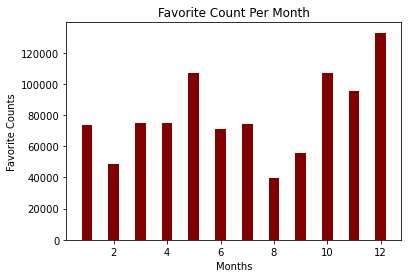

In [72]:
plt.bar(df['month'], df['favorite_count'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Months")
plt.ylabel("Favorite Counts")
plt.title("Favorite Count Per Month")
plt.show()

The month of December has the highest Favorite count

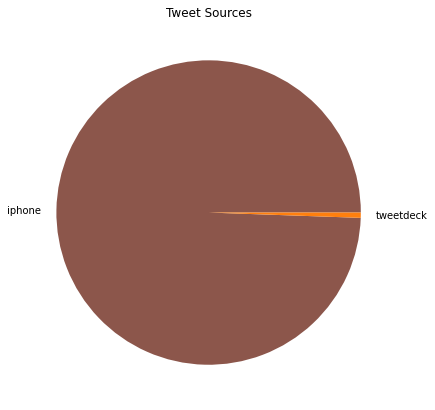

In [73]:
source = df['source']
count = df['source'].value_counts()
label = ['iphone', 'tweetdeck']
colors = ["#8c564b", "#ff7f0e"]
fig = plt.figure(figsize =(10, 7))
plt.pie(count, labels = label,colors=colors)
plt.title("Tweet Sources")
 
# show plot
plt.show()

Most tweets are made from iphones with a total of iphone 1960 and tweetdeck with a total of 11.

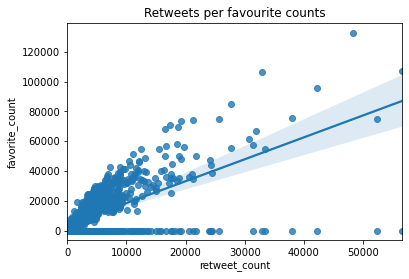

In [74]:
corr = sns.regplot(x="retweet_count", y="favorite_count", data=df)
plt.title("Retweets per favourite counts")
plt.show()

We can see there is a linear correlation between the retweets and favorite counts

<a id = 'conclision'></a>

## Conclusion

* Dogs bears the name 'Charlie' the most but least with 'Dot'
* We have an average of 3446 retweets and an average of 8777 favorite counts
* Highest retweets are made October 12, 2016 and Febrary 19,2017 with a total of 56.625 retweet counts.
* The month of December has the most favorite count.
* Tweets are made mostly from iphones with a total of iphone 1960 and tweetdeck with a total of 11.